In [ ]:
# all required libraries below
%pip install numpy --quiet
%pip install tonic --quiet
%pip install matplotlib --quiet
%pip install snntorch --quiet
%pip install torch --quiet

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# each sequence of gestures for each subject is divided into 11 .npy files, which are named according to the target labels. 
# file_name = '/kaggle/input/create-dvs128gesture-tonic-dataset/DVSGesture/ibmGestureTest/user26_led/9.npy'
file_name = '/home/gauravgupta/CMPM118/data/DVSGesture/ibmGestureTest/user26_led/9.npy'

# each file contains a list of events (x-pos, y-pos, polarity, timestamp).
arr = np.load(file_name)
arr[:, 3] *= 1000  # convert from ms to us
dtype = np.dtype([("x", np.int16), ("y", np.int16), ("p", bool), ("t", np.int64)])
arr = rf.unstructured_to_structured(arr, dtype)

print("A single event:", arr[0], "as (x-pos, y-pos, polarity, timestamp).")

# np.savetxt("./DVSGesture/ibmGestureTest/user26_led/9.csv", arr, delimiter=",") # save as csv

NameError: name 'np' is not defined

In [ ]:
# import tonic
# tonic.datasets.DVSGesture(save_to="/home/gauravgupta/CMPM118/data", train=True)
# tonic.datasets.DVSGesture(save_to="/home/gauravgupta/CMPM118/data", train=False)


2443675648it [08:55, 4559650.14it/s]                                


Extracting /home/gauravgupta/CMPM118/data/DVSGesture/ibmGestureTrain.tar.gz to /home/gauravgupta/CMPM118/data/DVSGesture


691456000it [02:33, 4491887.82it/s]                               


Extracting /home/gauravgupta/CMPM118/data/DVSGesture/ibmGestureTest.tar.gz to /home/gauravgupta/CMPM118/data/DVSGesture


DVSGesture

In [ ]:
import numpy as np
import numpy.lib.recfunctions as rf

In [ ]:
# each sequence of gestures for each subject is divided into 11 .npy files, which are named according to the target labels. 
file_name = '/home/gauravgupta/CMPM118/data/DVSGesture/ibmGestureTest/user26_led/9.npy'

# each file contains a list of events (x-pos, y-pos, polarity, timestamp).
arr = np.load(file_name)
arr[:, 3] *= 1000  # convert from ms to us
dtype = np.dtype([("x", np.int16), ("y", np.int16), ("p", bool), ("t", np.int64)])
arr = rf.unstructured_to_structured(arr, dtype)

print("A single event:", arr[0], "as (x-pos, y-pos, polarity, timestamp).")

# np.savetxt("./DVSGesture/ibmGestureTest/user26_led/9.csv", arr, delimiter=",") # save as csv

A single event: (55, 103, False, 13) as (x-pos, y-pos, polarity, timestamp).


In [ ]:
import tonic
import matplotlib.pyplot as plt
from IPython.display import HTML

def to_frames(events):
     # creates dense frames from events by binning them in different ways
    frame_transform = tonic.transforms.ToFrame(
        sensor_size=tonic.datasets.DVSGesture.sensor_size, 
        #time_window=10000)
        n_time_bins=100)
        #event_count=1000)
    return frame_transform(events)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.0].


Train dataset contains 1077 samples.
There are 114019 events in the selected sample.
A single event: (62, 94, False, 15) as (x-pos, y-pos, polarity, timestamp).
(100, 2, 128, 128) 0


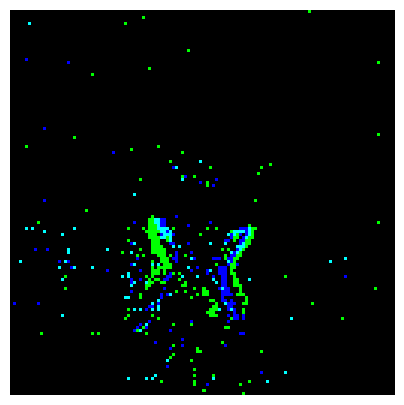

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..9.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..14.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..13.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..7.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..8.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] fo

In [ ]:
dataset_path = '/home/gauravgupta/CMPM118/data'
train = tonic.datasets.DVSGesture(save_to=dataset_path, train=True)
test = tonic.datasets.DVSGesture(save_to=dataset_path, train=False)

events, label = train[1]
frames = to_frames(events)

print("Train dataset contains", len(train), "samples.")
print("There are", len(events), "events in the selected sample.")
print("A single event:", events[1], "as (x-pos, y-pos, polarity, timestamp).")
print (frames.shape, label)

ani = tonic.utils.plot_animation(frames) # plot one frame
HTML(ani.to_jshtml()) # animate all frames

In [ ]:
w,h=32,32
n_frames=32 #100
debug = False

transforms = tonic.transforms.Compose([
    tonic.transforms.Denoise(filter_time=10000), # removes outlier events with inactive surrounding pixels for 10ms
    tonic.transforms.Downsample(sensor_size=tonic.datasets.DVSGesture.sensor_size, target_size=(w,h)), # downsampling image
    tonic.transforms.ToFrame(sensor_size=(w,h,2), n_time_bins=n_frames), # n_frames frames per trail
])

train2 = tonic.datasets.DVSGesture(save_to=dataset_path, transform=transforms, train=True)
test2 = tonic.datasets.DVSGesture(save_to=dataset_path, transform=transforms, train=False)

cached_train = train2 if debug else tonic.DiskCachedDataset(train2, cache_path='/home/gauravgupta/CMPM118/data/dvsgesture/train')
cached_test = test2 if debug else tonic.DiskCachedDataset(test2, cache_path='/home/gauravgupta/CMPM118/data/dvsgesture/test')

frames, label = cached_train[1]
ani = tonic.utils.plot_animation(frames)
print(frames.shape, label)
HTML(ani.to_jshtml())

NameError: name 'tonic' is not defined

In [ ]:
import torch
import torch.nn as nn
import snntorch as snn
from snntorch import surrogate
from snntorch import functional as SF
from snntorch import utils

In [ ]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
print(device)

cuda


In [ ]:
grad = snn.surrogate.fast_sigmoid(slope=25) # surrogate.atan()
beta = 0.5

# 12C5-MP2-32C5-MP2-800FC11 https://snntorch.readthedocs.io/en/latest/tutorials/tutorial_7.html
net = nn.Sequential(
    nn.Conv2d(2, 12, 5), # in_channels, out_channels, kernel_size
    nn.MaxPool2d(2),
    snn.Leaky(beta=beta, spike_grad=grad, init_hidden=True),
    nn.Conv2d(12, 32, 5),
    nn.MaxPool2d(2),
    snn.Leaky(beta=beta, spike_grad=grad, init_hidden=True),
    nn.Flatten(),
    nn.Linear(800, 11), #800
    snn.Leaky(beta=beta, spike_grad=grad, init_hidden=True, output=True)
).to(device)

def forward_pass(net, data):
    spk_rec = []
    snn.utils.reset(net)  # resets hidden states for all LIF neurons in net
    for step in range(data.size(0)): # data.size(0) = number of time steps
        spk_out, mem_out = net(data[step])
        spk_rec.append(spk_out)
    return torch.stack(spk_rec)

optimizer = torch.optim.Adam(net.parameters(), lr=0.002, betas=(0.9, 0.999))
loss_fn = SF.mse_count_loss(correct_rate=0.8, incorrect_rate=0.2)

loss_hist = []
acc_hist = []
test_acc_hist = []

In [ ]:
def validate_model():
    correct, total = 0, 0  
    for batch, (data, targets) in enumerate(iter(test_loader)): 
        data, targets = data.to(device), targets.to(device) # [n_frames, batch, polarity, x-pos, y-pos] [batch] 
        spk_rec = forward_pass(net, data)         
        correct += SF.accuracy_rate(spk_rec, targets) * data.shape[0]
        total += data.shape[0]
    return correct/total

In [ ]:
num_epochs = 100
cnt = 0

train_loader = torch.utils.data.DataLoader(cached_train, batch_size=64, shuffle=True, drop_last=True, 
                                           collate_fn=tonic.collation.PadTensors(batch_first=False))
test_loader = torch.utils.data.DataLoader(cached_test, batch_size=32, shuffle=True, drop_last=True, 
                                          collate_fn=tonic.collation.PadTensors(batch_first=False))

for epoch in range(num_epochs):
    for batch, (data, targets) in enumerate(iter(train_loader)):
        data = data.to(device)
        targets = targets.to(device)

        net.train()
        # propagating one batch through the network and evaluating loss
        spk_rec = forward_pass(net, data)
        loss = loss_fn(spk_rec, targets)

        # Gradient calculation + weight update
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # Store loss history for future plotting
        loss_hist.append(loss.item())

        acc = SF.accuracy_rate(spk_rec, targets)
        acc_hist.append(acc)

        if cnt % 50 == 0:
            print(f"Epoch {epoch}, Iteration {batch} \nTrain Loss: {loss.item():.2f}")
            print(f"Train Accuracy: {acc * 100:.2f}%")
            test_acc = validate_model()            
            test_acc_hist.append(test_acc)
            print(f"Test Accuracy: {test_acc * 100:.2f}%\n")

        cnt+=1

NameError: name 'cached_train' is not defined